# Seismic Event Prediction Model
**Name:** Fathima Rizwana N S

**Organization:** Entri Elevate

**Date:** 28/05/2024


###  Overview of Problem Statement:


Predicting seismic events such as earthquakes is crucial for mitigating their potential impact on communities and infrastructure. Despite advancements in seismology, accurately forecasting earthquakes remains a complex challenge due to the intricate interplay of geological factors. Therefore, developing robust predictive models can aid in early warning systems and disaster preparedness efforts.

###  Objective:

To develop an effective seismic event prediction model using machine learning techniques, leveraging historical earthquake data and associated environmental factors.

### Data Description:

**Source:**  Kaggle (https://www.kaggle.com/datasets/warcoder/earthquake-dataset)

**Features:** 
* title: Title name given to the earthquake
* magnitude: The magnitude of the earthquake(target variable)
* date_time: Date and time
* cdi: The maximum reported intensity for the event range
* mmi: The maximum estimated instrumental intensity for the event
* alert: The alert level - "green", "yellow", "orange", and "red"
* tsunami: "1" for events in oceanic regions and "0" otherwise
* sig: A number describing how significant the event is
* net: The ID of a data contributor
* nst: The total number of seismic stations used to determine earthquake location
* dmin: Horizontal distance from the epicenter to the nearest station
* gap: The largest azimuthal gap between azimuthally adjacent stations (in degrees)
* magType: The method or algorithm used to calculate the preferred magnitude for the event
* depth: The depth where the earthquake begins to rupture
* latitude / longitude: Coordinate system for the earthquake's location
* location: Location within the country
* continent: Continent of the earthquake-hit country
* country: Affected country

### Data Collection:

In [85]:
#Import the necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder,StandardScaler
from category_encoders import TargetEncoder

In [86]:
# Load the dataset
data = pd.read_csv('Dataset\\earthquake_1995-2023.csv')

### Data Preprocessing - Data Cleaning:
   #### -Handle missing values using appropriate imputation techniques.



In [87]:
# Check for missing values
data.isnull().sum()

title          0
magnitude      0
date_time      0
cdi            0
mmi            0
alert        551
tsunami        0
sig            0
net            0
nst            0
dmin           0
gap            0
magType        0
depth          0
latitude       0
longitude      0
location       6
continent    716
country      349
dtype: int64

In [88]:
# Count the number of duplicate rows in the DataFrame
data.duplicated().sum()

0

In [89]:
#Unique values in 'alert' column
data['alert'].unique()

array(['green', 'yellow', nan, 'orange', 'red'], dtype=object)

In [90]:
#Unique values in 'continent' column
data['continent'].unique()

array([nan, 'South America', 'Asia', 'Oceania', 'North America', 'Europe',
       'Africa'], dtype=object)

In [91]:
#Unique values in 'country' column
data['country'].unique()

array(['Vanuatu', nan, 'Argentina', 'Colombia', 'Indonesia',
       'Russian Federation (the)', 'Papua New Guinea', 'Afghanistan',
       'Ecuador', 'Tajikistan', 'Turkiye', 'Solomon Islands', 'Fiji',
       'Panama', 'Mexico', 'Taiwan', "People's Republic of China",
       'Philippines', 'Brazil', 'Peru', 'United States of America',
       'Antarctica', 'Haiti', 'Japan', 'Mongolia', 'Greece', 'Chile',
       'Russia', 'Turkey',
       'United Kingdom of Great Britain and Northern Ireland (the)',
       'South Georgia and the South Sandwich Islands', 'Venezuela',
       'Bolivia', 'Costa Rica', 'Iran', 'Guatemala', 'Botswana',
       'New Zealand', 'Italy', 'Myanmar', 'India', 'Nepal', 'Nicaragua',
       'Pakistan', 'Canada', 'Tonga', 'Kyrgyzstan', 'Martinique',
       'Mozambique', 'Tanzania', 'Algeria', 'El Salvador', 'Turkmenistan',
       'Azerbaijan', 'Iceland', 'Trinidad and Tobago', 'Saudi Arabia'],
      dtype=object)

In [92]:
# Fill 'alert' column with the mode
alert_mode = data['alert'].mode()[0]
data['alert'].fillna(alert_mode, inplace=True)

In [93]:
# Fill 'continent' column using a predefined map based on 'country'
continent_map = {
    'Vanuatu': 'Oceania', 'Argentina': 'South America', 'Colombia': 'South America', 'Indonesia': 'Asia',
    'Russian Federation (the)': 'Europe', 'Papua New Guinea': 'Oceania', 'Afghanistan': 'Asia',
    'Ecuador': 'South America', 'Tajikistan': 'Asia', 'Turkiye': 'Asia', 'Solomon Islands': 'Oceania',
    'Fiji': 'Oceania', 'Panama': 'North America', 'Mexico': 'North America', 'Taiwan': 'Asia',
    "People's Republic of China": 'Asia', 'Philippines': 'Asia', 'Brazil': 'South America', 'Peru': 'South America',
    'United States of America': 'North America', 'Antarctica': 'Antarctica', 'Haiti': 'North America', 'Japan': 'Asia',
    'Mongolia': 'Asia', 'Greece': 'Europe', 'Chile': 'South America', 'Russia': 'Europe', 'Turkey': 'Asia',
    'United Kingdom of Great Britain and Northern Ireland (the)': 'Europe',
    'South Georgia and the South Sandwich Islands': 'Antarctica', 'Venezuela': 'South America', 'Bolivia': 'South America',
    'Costa Rica': 'North America', 'Iran': 'Asia', 'Guatemala': 'North America', 'Botswana': 'Africa',
    'New Zealand': 'Oceania', 'Italy': 'Europe', 'Myanmar': 'Asia', 'India': 'Asia', 'Nepal': 'Asia',
    'Nicaragua': 'North America', 'Pakistan': 'Asia', 'Canada': 'North America', 'Tonga': 'Oceania', 'Kyrgyzstan': 'Asia',
    'Martinique': 'North America', 'Mozambique': 'Africa', 'Tanzania': 'Africa', 'Algeria': 'Africa',
    'El Salvador': 'North America', 'Turkmenistan': 'Asia', 'Azerbaijan': 'Asia', 'Iceland': 'Europe',
    'Trinidad and Tobago': 'North America', 'Saudi Arabia': 'Asia'
}

data['continent'] = data.apply(
    lambda row: continent_map.get(row['country']) if pd.isnull(row['continent']) else row['continent'],
    axis=1
)

# Fill remaining missing values in 'continent' with the mode
continent_mode = data['continent'].mode()[0]
data['continent'].fillna(continent_mode, inplace=True)

In [94]:
# Fill 'country' column with 'Unknown'
data['country'].fillna('Unknown', inplace=True)

In [95]:
# Check for missing values
data.isnull().sum()

title        0
magnitude    0
date_time    0
cdi          0
mmi          0
alert        0
tsunami      0
sig          0
net          0
nst          0
dmin         0
gap          0
magType      0
depth        0
latitude     0
longitude    0
location     6
continent    0
country      0
dtype: int64

In [96]:
# Drop rows with null values
data.dropna(inplace=True)

In [97]:
len(data)

994

#### - Check for and handle outliers using statistical methods.

In [98]:
from scipy.stats import mstats

# Capping method: Cap the values outside the 5th and 95th percentiles
def cap_outliers(series, lower_quantile=0.05, upper_quantile=0.95):
    lower_bound = series.quantile(lower_quantile)
    upper_bound = series.quantile(upper_quantile)
    return series.clip(lower_bound, upper_bound)

# Apply the capping method to each numeric column in the DataFrame
for col in data.select_dtypes(include=["int", "float"]).columns:
    data[col] = cap_outliers(data[col])

# Print the first few rows of the modified DataFrame
print(data.head())

                                      title  magnitude         date_time  cdi  \
0          M 6.5 - 42 km W of Sola, Vanuatu        6.5  16-08-2023 12:47    7   
1  M 6.5 - 43 km S of Intipucá, El Salvador        6.5  19-07-2023 00:22    8   
2  M 6.6 - 25 km ESE of Loncopué, Argentina        6.6  17-07-2023 03:05    7   
3     M 7.2 - 98 km S of Sand Point, Alaska        7.2  16-07-2023 06:48    6   
4                  M 7.3 - Alaska Peninsula        7.3  16-07-2023 06:48    0   

   mmi   alert  tsunami    sig net  nst      dmin     gap magType    depth  \
0    4   green        0  657.0  us  114  5.229850  25.000     mww  192.955   
1    6  yellow        0  775.0  us   92  0.679000  40.000     mww   69.727   
2    5   green        0  899.0  us   70  1.634000  28.000     mww  171.371   
3    6   green        1  860.0  us  173  0.907000  36.000     mww   32.571   
4    5   green        1  820.0  at   79  0.879451  54.035      Mi   21.000   

    latitude  longitude               locati

In [99]:
len(data)

994

#### - Address skewed data in numerical features through transformations.

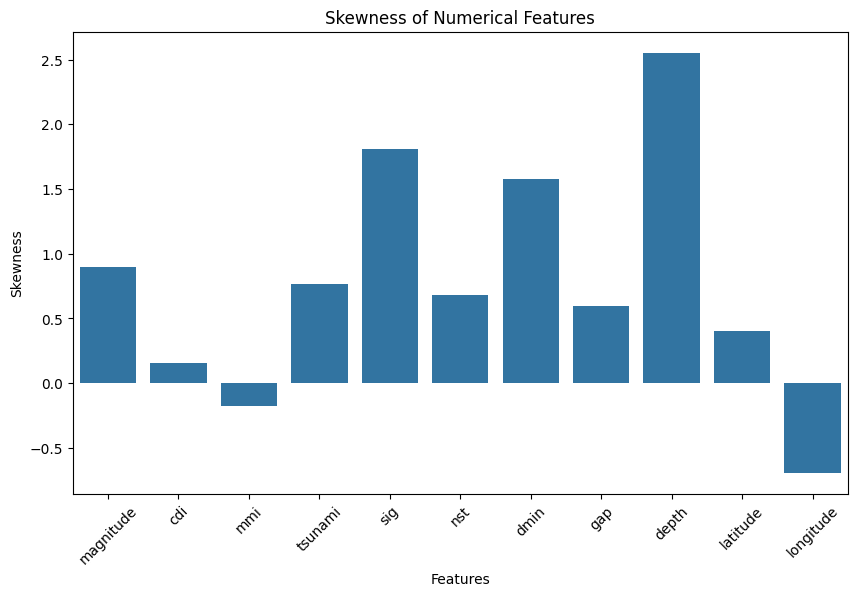

Skewed Features:
Index(['magnitude', 'tsunami', 'sig', 'nst', 'dmin', 'gap', 'depth'], dtype='object')


In [100]:
# Select numerical features
numerical_features = data.select_dtypes(include=[np.number])

# Calculate skewness for each numerical feature
skewness = numerical_features.apply(lambda x: x.skew())

# Visualize skewness
plt.figure(figsize=(10, 6))
sns.barplot(x=skewness.index, y=skewness)
plt.title('Skewness of Numerical Features')
plt.xticks(rotation=45)
plt.xlabel('Features')
plt.ylabel('Skewness')
plt.show()

# Identify features with skewness greater than a threshold (e.g., 0.5)
skewed_features = skewness[skewness > 0.5].index
print("Skewed Features:")
print(skewed_features)

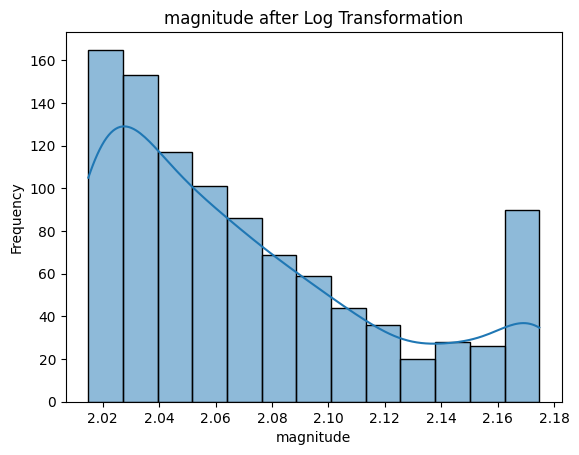

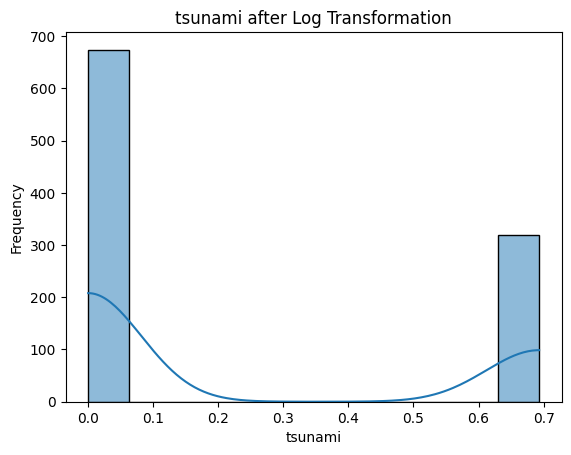

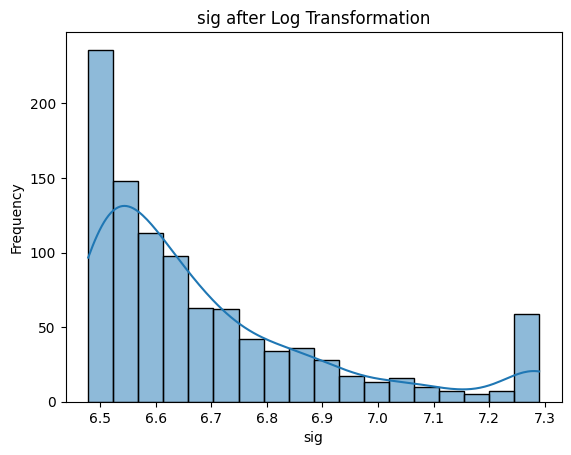

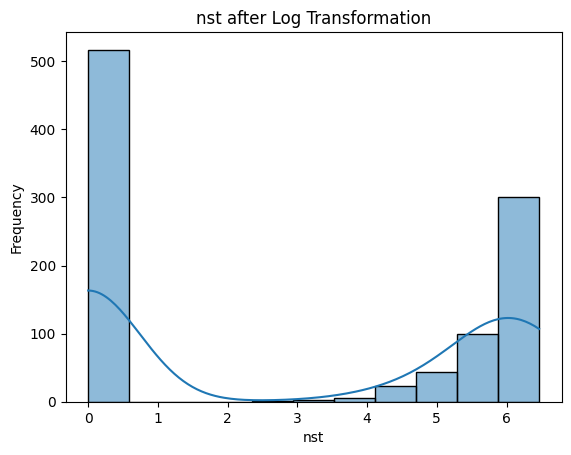

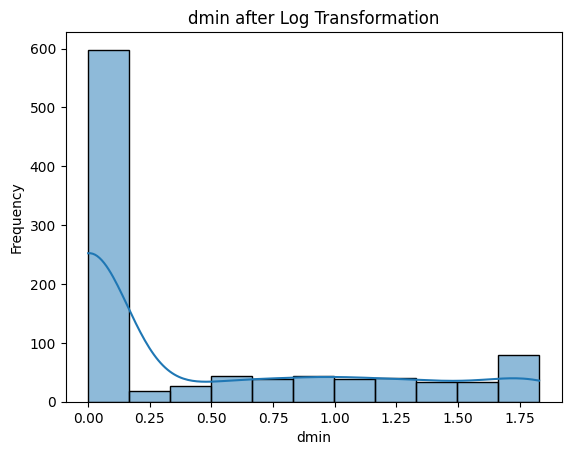

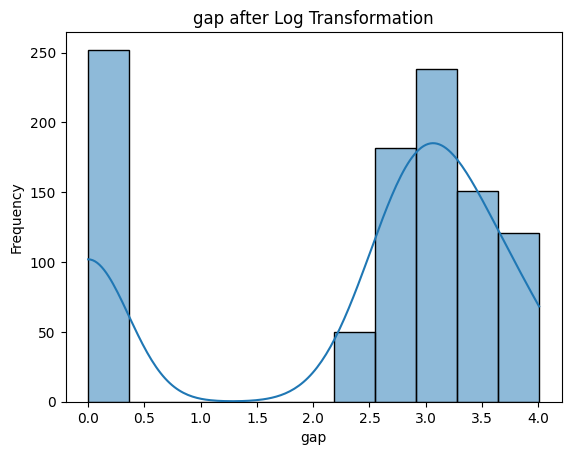

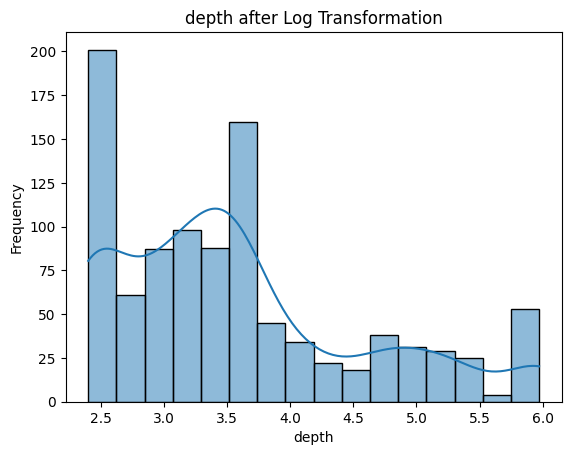

In [101]:
# Apply log transformation to each skewed feature
for feature in skewed_features:
    data[feature] = np.log1p(data[feature])  # Using log1p to handle zero values

# Visualize the transformed distributions (optional)
import seaborn as sns
import matplotlib.pyplot as plt

for feature in skewed_features:
    sns.histplot(data[feature], kde=True)
    plt.title(f'{feature} after Log Transformation')
    plt.xlabel(feature)
    plt.ylabel('Frequency')
    plt.show()

### **Exploratory Data Analysis (EDA):**

In [102]:
data.dtypes

title         object
magnitude    float64
date_time     object
cdi            int64
mmi            int64
alert         object
tsunami      float64
sig          float64
net           object
nst          float64
dmin         float64
gap          float64
magType       object
depth        float64
latitude     float64
longitude    float64
location      object
continent     object
country       object
dtype: object

In [103]:
# Display the first few rows of the DataFrame
print(data.head())

                                      title  magnitude         date_time  cdi  \
0          M 6.5 - 42 km W of Sola, Vanuatu   2.014903  16-08-2023 12:47    7   
1  M 6.5 - 43 km S of Intipucá, El Salvador   2.014903  19-07-2023 00:22    8   
2  M 6.6 - 25 km ESE of Loncopué, Argentina   2.028148  17-07-2023 03:05    7   
3     M 7.2 - 98 km S of Sand Point, Alaska   2.104134  16-07-2023 06:48    6   
4                  M 7.3 - Alaska Peninsula   2.116256  16-07-2023 06:48    0   

   mmi   alert   tsunami       sig net       nst      dmin       gap magType  \
0    4   green  0.000000  6.489205  us  4.744932  1.829352  3.258097     mww   
1    6  yellow  0.000000  6.654153  us  4.532599  0.518198  3.713572     mww   
2    5   green  0.000000  6.802395  us  4.262680  0.968504  3.367296     mww   
3    6   green  0.693147  6.758095  us  5.159055  0.645531  3.610918     mww   
4    5   green  0.693147  6.710523  at  4.382027  0.630980  4.007969      Mi   

      depth   latitude  longitud

In [104]:
# Display basic information about the dataset
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 994 entries, 0 to 999
Data columns (total 19 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   title      994 non-null    object 
 1   magnitude  994 non-null    float64
 2   date_time  994 non-null    object 
 3   cdi        994 non-null    int64  
 4   mmi        994 non-null    int64  
 5   alert      994 non-null    object 
 6   tsunami    994 non-null    float64
 7   sig        994 non-null    float64
 8   net        994 non-null    object 
 9   nst        994 non-null    float64
 10  dmin       994 non-null    float64
 11  gap        994 non-null    float64
 12  magType    994 non-null    object 
 13  depth      994 non-null    float64
 14  latitude   994 non-null    float64
 15  longitude  994 non-null    float64
 16  location   994 non-null    object 
 17  continent  994 non-null    object 
 18  country    994 non-null    object 
dtypes: float64(9), int64(2), object(8)
memory usage: 155.3+

In [105]:
# Summary statistics of numerical columns
print(data.describe())

        magnitude         cdi         mmi     tsunami         sig         nst  \
count  994.000000  994.000000  994.000000  994.000000  994.000000  994.000000   
mean     2.068784    3.607646    6.054326    0.223146    6.691876    2.802952   
std      0.048832    3.334791    1.239281    0.324013    0.220059    2.952820   
min      2.014903    0.000000    4.000000    0.000000    6.478510    0.000000   
25%      2.028148    0.000000    5.000000    0.000000    6.539586    0.000000   
50%      2.054124    4.000000    6.000000    0.000000    6.614055    0.000000   
75%      2.091864    7.000000    7.000000    0.693147    6.775081    6.005119   
max      2.174752    9.000000    8.000000    0.693147    7.289679    6.467699   

             dmin         gap       depth    latitude   longitude  
count  994.000000  994.000000  994.000000  994.000000  994.000000  
mean     0.448787    2.361506    3.564099    4.855504   51.650508  
std      0.629808    1.428954    0.996829   24.990448  116.663395 

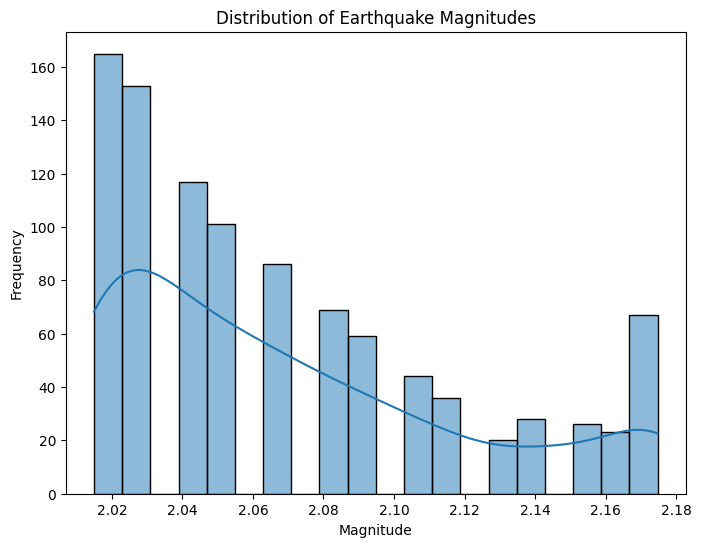

In [106]:
# Histogram of earthquake magnitudes
plt.figure(figsize=(8, 6))
sns.histplot(data=data, x='magnitude', bins=20, kde=True, edgecolor='black')
plt.xlabel('Magnitude')
plt.ylabel('Frequency')
plt.title('Distribution of Earthquake Magnitudes')
plt.show()

##### Magnitude Distribution: The histogram of earthquake magnitudes shows that most earthquakes in the dataset have magnitudes between 2 and 2.18.

C:\Users\Saeed\AppData\Local\Temp\ipykernel_21072\2605960147.py:2: UserWarning: Parsing dates in %d-%m-%Y %H:%M format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  data['date_time'] = pd.to_datetime(data['date_time'])


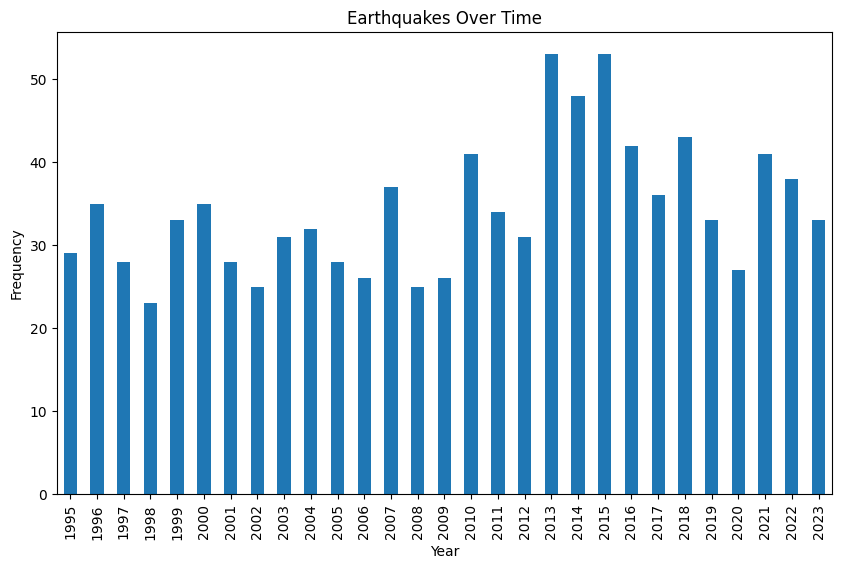

In [107]:
# Temporal analysis
data['date_time'] = pd.to_datetime(data['date_time'])
data['year'] = data['date_time'].dt.year

plt.figure(figsize=(10, 6))
data['year'].value_counts().sort_index().plot(kind='bar')
plt.title("Earthquakes Over Time")
plt.xlabel("Year")
plt.ylabel("Frequency")
plt.show()

# Drop the 'year' column
data.drop(columns=['year'], inplace=True)

##### The temporal analysis reveals interesting trends in earthquake frequency over the years. In particular:
##### The year 2015 stands out as having the highest frequency of earthquakes in the dataset,the year 2020 exhibits the lowest frequency of earthquakes.

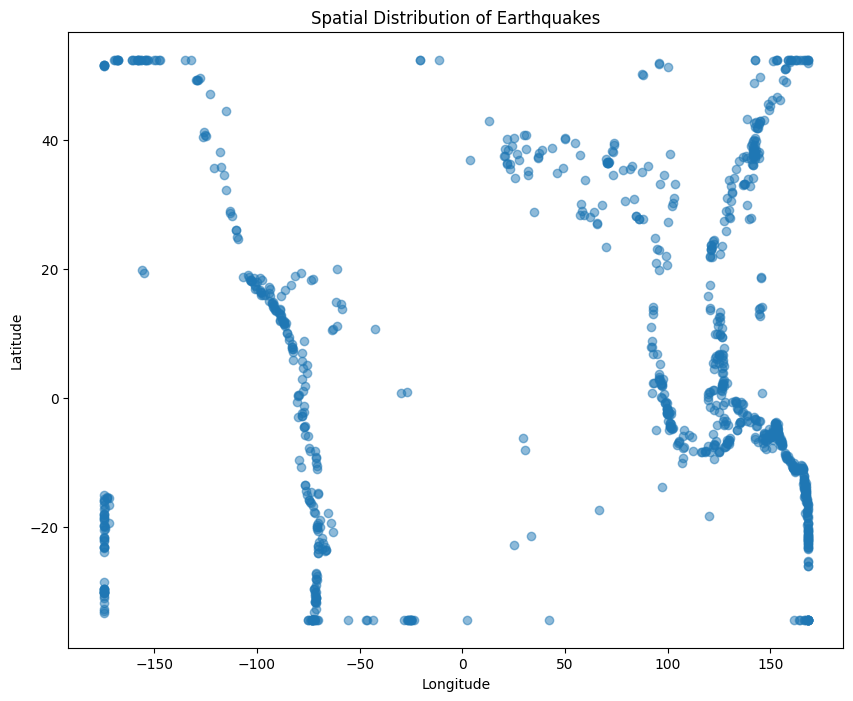

In [108]:
# Spatial analysis
plt.figure(figsize=(10, 8))
plt.scatter(data['longitude'], data['latitude'], alpha=0.5)
plt.title("Spatial Distribution of Earthquakes")
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.show()

##### Spatial Analysis: Earthquakes are distributed across different regions, as indicated by the scatter plot of latitude and longitude coordinates. Some areas may have a higher frequency of earthquakes compared to others.

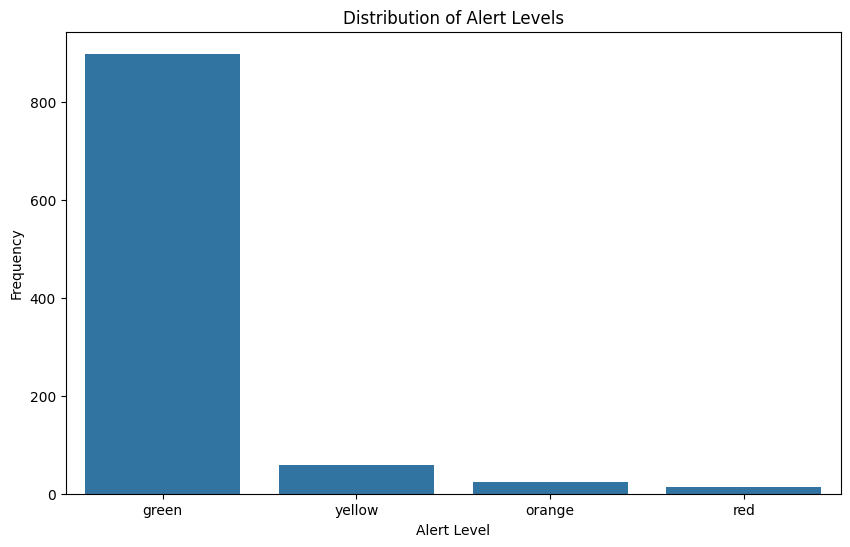

In [109]:
# Impact analysis
plt.figure(figsize=(10, 6))
sns.countplot(data=data, x='alert', order=['green', 'yellow', 'orange', 'red'])
plt.title("Distribution of Alert Levels")
plt.xlabel("Alert Level")
plt.ylabel("Frequency")
plt.show()

##### Impact Analysis: Most earthquakes in the dataset have a "green" alert level, indicating low impact.

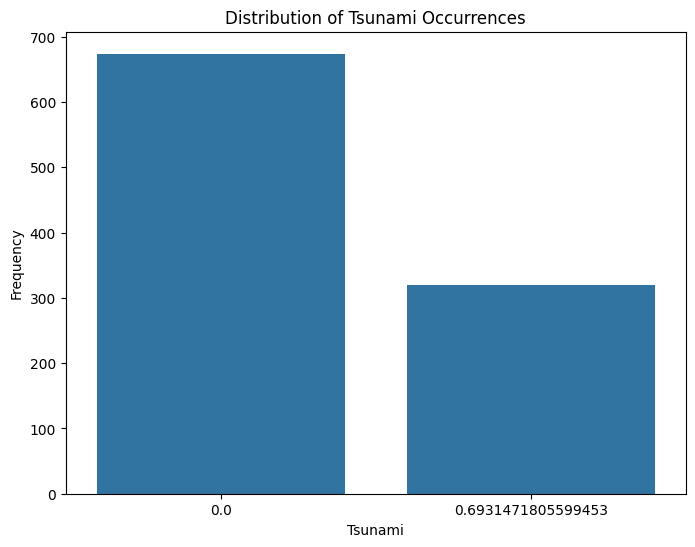

In [110]:
plt.figure(figsize=(8, 6))
sns.countplot(data=data, x='tsunami')
plt.title("Distribution of Tsunami Occurrences")
plt.xlabel("Tsunami")
plt.ylabel("Frequency")
plt.show()

##### The majority of earthquakes are not associated with tsunamis, as shown by the count plot of tsunami occurrences.


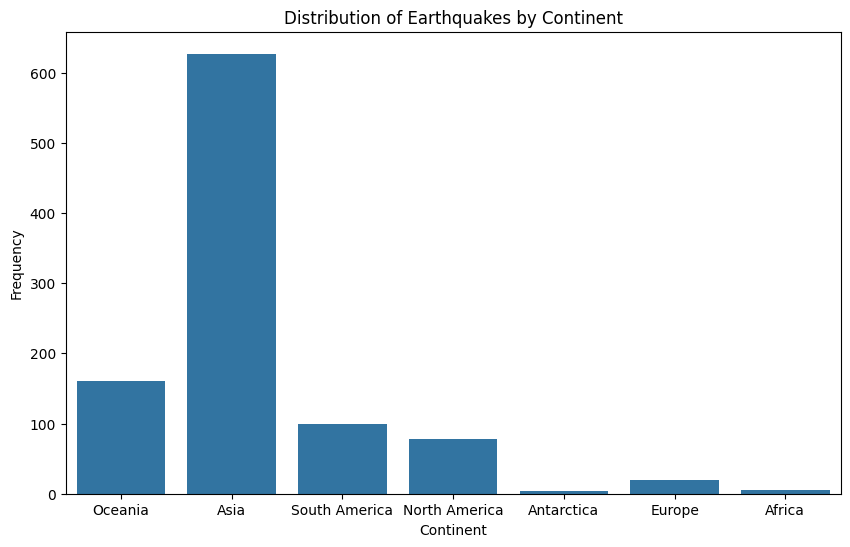

In [111]:
# Continent and Country Analysis
plt.figure(figsize=(10, 6))
sns.countplot(data=data, x='continent')
plt.title("Distribution of Earthquakes by Continent")
plt.xlabel("Continent")
plt.ylabel("Frequency")
plt.show()

##### Continent and Country Analysis: Asia is the continent most affected by earthquakes, followed by other continents.

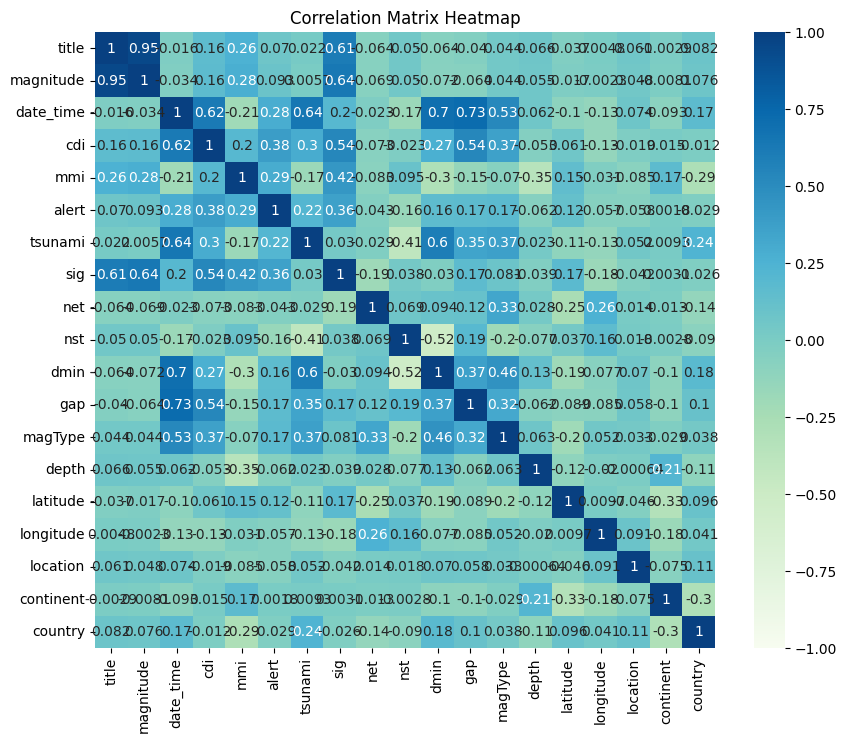

Highly Correlated Pairs (correlation > 0.8 or < -0.8):
('magnitude', 'title', 0.9516091241102367)


In [112]:
# Identify and encode categorical columns
categorical_columns = data.select_dtypes(include=['object', 'category']).columns.tolist()
label_encoders = {}
for col in categorical_columns:
    label_encoders[col] = LabelEncoder()
    data[col] = label_encoders[col].fit_transform(data[col])

# Calculate the correlation matrix
correlation_matrix = data.corr()

# Visualize the correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='GnBu', vmin=-1, vmax=1)
plt.title('Correlation Matrix Heatmap')
plt.show()

# Identify highly correlated pairs
threshold = 0.8
highly_correlated_pairs = []
for i in range(len(correlation_matrix.columns)):
    for j in range(i):
        if abs(correlation_matrix.iloc[i, j]) > threshold:
            colname1 = correlation_matrix.columns[i]
            colname2 = correlation_matrix.columns[j]
            highly_correlated_pairs.append((colname1, colname2, correlation_matrix.iloc[i, j]))

# Print highly correlated pairs
print("Highly Correlated Pairs (correlation > 0.8 or < -0.8):")
for pair in highly_correlated_pairs:
    print(pair)

# Convert encoded columns back to original labels
for col in categorical_columns:
    data[col] = label_encoders[col].inverse_transform(data[col])

##### Correlation Analysis: The correlation heatmap shows correlations between numerical features.'title' and 'magnitude' are highly correlated.

In [113]:
#dropping the column'title
data = data.drop(columns=['title'])

###  **Feature Engineering:**

In [114]:
# One-hot encoding for 'alert' and 'magType'
data = pd.get_dummies(data, columns=['alert', 'magType','net','continent'], drop_first=False)

# Target encoding for 'country', 'location', and 'continent'
encoder = TargetEncoder(cols=['country', 'location'])
data[['country_encoded', 'location_encoded']] = encoder.fit_transform(data[['country', 'location']], data['magnitude'])

# Drop original categorical columns
data.drop(['country', 'location'], axis=1, inplace=True)

# Optionally drop 'date_time' and 'net'
data.drop(['date_time'], axis=1, inplace=True)

# Verify the encoded DataFrame
print(data.head())


   magnitude  cdi  mmi   tsunami       sig       nst      dmin       gap  \
0   2.014903    7    4  0.000000  6.489205  4.744932  1.829352  3.258097   
1   2.014903    8    6  0.000000  6.654153  4.532599  0.518198  3.713572   
2   2.028148    7    5  0.000000  6.802395  4.262680  0.968504  3.367296   
3   2.104134    6    6  0.693147  6.758095  5.159055  0.645531  3.610918   
4   2.116256    0    5  0.693147  6.710523  4.382027  0.630980  4.007969   

      depth   latitude  ...  net_uw  continent_Africa  continent_Antarctica  \
0  5.267626 -13.881400  ...   False             False                 False   
1  4.258827  12.814000  ...   False             False                 False   
2  5.149649 -34.302600  ...   False             False                 False   
3  3.513663  52.422085  ...   False             False                 False   
4  3.091042  52.422085  ...   False             False                 False   

   continent_Asia  continent_Europe  continent_North America  \
0   

### **Split Data into Training and Testing Sets:**


In [115]:
# Split features and target variable
X = data.drop(columns=['magnitude'])
y = data['magnitude']

In [116]:
# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### **Feature Selection:**

In [117]:
from sklearn.feature_selection import SelectKBest, mutual_info_regression

# Initialize SelectKBest with mutual_info_regression as the scoring function
k_best_selector = SelectKBest(score_func=mutual_info_regression, k=5)

# Fit the selector on the training data
X_train_selected = k_best_selector.fit_transform(X_train, y_train)

# Print the selected features
selected_features = X.columns[k_best_selector.get_support()]
print("Selected Features:", selected_features)

# Transform the test data using the same selector
X_test_selected = k_best_selector.transform(X_test)

Selected Features: Index(['cdi', 'mmi', 'sig', 'country_encoded', 'location_encoded'], dtype='object')


### **Feature Scaling:**

In [118]:
# Scale numerical features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_selected)
X_test_scaled = scaler.transform(X_test_selected)

### **Build the ML Model:**


In [119]:
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, ExtraTreesRegressor
from sklearn.tree import DecisionTreeRegressor
from xgboost import XGBRegressor
from catboost import CatBoostRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np
from sklearn.model_selection import cross_val_score

def evaluate_model(model, X_train, X_test, y_train, y_test,metrics_list):

    # Train the model
    model.fit(X_train, y_train)
    
    # Make predictions
    y_pred = model.predict(X_test)
    
    # Calculate metrics
    mae = mean_absolute_error(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_test, y_pred)
    cv_scores = cross_val_score(model, X, y, cv=5)

# Store metrics in a dictionary
    metrics = {
            'Model': model.__class__.__name__,
            'MAE': mae,
            'MSE': mse,
            'RMSE': rmse,
            'R^2 Score': r2,
            'Mean CV R^2 Score': cv_scores.mean()
        }
        
    metrics_list.append(metrics)

    
# List of models
models = [
    RandomForestRegressor(random_state=42),
    GradientBoostingRegressor(random_state=42),
    ExtraTreesRegressor(random_state=42),
    DecisionTreeRegressor(random_state=42),
    XGBRegressor(random_state=42),
    CatBoostRegressor(random_state=42, verbose=0)  # verbose=0 to suppress CatBoost output
]

# Lists to collect metrics
metrics_list_before_tuning = []
metrics_list_after_tuning = []

# Evaluate each model
for model in models:
    evaluate_model(model, X_train_scaled, X_test_scaled, y_train, y_test,metrics_list_before_tuning)


### Model Evaluation:

In [120]:
# Create a DataFrame from the metrics before tuning
metrics_df_before_tuning = pd.DataFrame(metrics_list_before_tuning)

# Print the DataFrame before tuning
print("Metrics before hyperparameter tuning:")
print(metrics_df_before_tuning)

Metrics before hyperparameter tuning:
                       Model       MAE       MSE      RMSE  R^2 Score  \
0      RandomForestRegressor  0.006016  0.000147  0.012138   0.938039   
1  GradientBoostingRegressor  0.007750  0.000203  0.014246   0.914648   
2        ExtraTreesRegressor  0.006180  0.000168  0.012951   0.929458   
3      DecisionTreeRegressor  0.007810  0.000330  0.018153   0.861421   
4               XGBRegressor  0.007827  0.000222  0.014890   0.906765   
5          CatBoostRegressor  0.007747  0.000207  0.014388   0.912946   

   Mean CV R^2 Score  
0           0.896409  
1           0.909231  
2           0.903240  
3           0.819954  
4           0.907135  
5           0.912996  


In [121]:
# Import necessary libraries for hyperparameter tuning
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

# Define hyperparameter grids for each model
param_grids = {
    'RandomForestRegressor': {
        'n_estimators': [100, 200, 300],
        'max_depth': [10, 20, None],
        'min_samples_split': [2, 5, 10]
    },
    'GradientBoostingRegressor': {
        'n_estimators': [100, 200, 300],
        'learning_rate': [0.01, 0.1, 0.2],
        'max_depth': [3, 5, 7]
    },
    'ExtraTreesRegressor': {
        'n_estimators': [100, 200, 300],
        'max_depth': [10, 20, None],
        'min_samples_split': [2, 5, 10]
    },
    'DecisionTreeRegressor': {
        'max_depth': [10, 20, None],
        'min_samples_split': [2, 5, 10]
    },
    'XGBRegressor': {
        'n_estimators': [100, 200, 300],
        'learning_rate': [0.01, 0.1, 0.2],
        'max_depth': [3, 5, 7]
    },
    'CatBoostRegressor': {
        'iterations': [100, 200, 300],
        'learning_rate': [0.01, 0.1, 0.2],
        'depth': [3, 5, 7]
    }
}

# Function to perform hyperparameter tuning for a given model
def hyperparameter_tuning(model, param_grid, X_train, y_train):
    grid_search = GridSearchCV(model, param_grid, cv=5, scoring='r2', n_jobs=-1, verbose=1)
    grid_search.fit(X_train, y_train)
    print(f"Best Parameters for {model.__class__.__name__}: {grid_search.best_params_}")
    return grid_search.best_estimator_

# Perform hyperparameter tuning for each model
best_models = {}
for model_name, model in zip([ 'RandomForestRegressor', 'GradientBoostingRegressor', 
                              'ExtraTreesRegressor', 'DecisionTreeRegressor', 'XGBRegressor', 
                              'CatBoostRegressor'],
                             [ RandomForestRegressor(random_state=42), GradientBoostingRegressor(random_state=42),ExtraTreesRegressor(random_state=42), 
                              DecisionTreeRegressor(random_state=42), XGBRegressor(random_state=42), 
                              CatBoostRegressor(random_state=42, verbose=0)]):
    print(f"Tuning {model_name}...")
    best_models[model_name] = hyperparameter_tuning(model, param_grids[model_name], X_train_scaled, y_train)

# Evaluate the best models
for model_name, best_model in best_models.items():
    print(f"Evaluating {model_name} with best parameters...")
    evaluate_model(best_model, X_train_scaled, X_test_scaled, y_train, y_test,metrics_list_after_tuning)

# Create a DataFrame from the metrics after tuning
metrics_df_after_tuning = pd.DataFrame(metrics_list_after_tuning)

# Print the DataFrame after tuning
print("Metrics after hyperparameter tuning:")
print(metrics_df_after_tuning)

Tuning RandomForestRegressor...
Fitting 5 folds for each of 27 candidates, totalling 135 fits
Best Parameters for RandomForestRegressor: {'max_depth': 20, 'min_samples_split': 2, 'n_estimators': 300}
Tuning GradientBoostingRegressor...
Fitting 5 folds for each of 27 candidates, totalling 135 fits
Best Parameters for GradientBoostingRegressor: {'learning_rate': 0.2, 'max_depth': 5, 'n_estimators': 200}
Tuning ExtraTreesRegressor...
Fitting 5 folds for each of 27 candidates, totalling 135 fits
Best Parameters for ExtraTreesRegressor: {'max_depth': 20, 'min_samples_split': 2, 'n_estimators': 300}
Tuning DecisionTreeRegressor...
Fitting 5 folds for each of 9 candidates, totalling 45 fits
Best Parameters for DecisionTreeRegressor: {'max_depth': 10, 'min_samples_split': 2}
Tuning XGBRegressor...
Fitting 5 folds for each of 27 candidates, totalling 135 fits
Best Parameters for XGBRegressor: {'learning_rate': 0.1, 'max_depth': 5, 'n_estimators': 300}
Tuning CatBoostRegressor...
Fitting 5 folds

In [122]:
# Find the index of the row with the highest R^2 score after tuning
best_model_idx = metrics_df_after_tuning['R^2 Score'].idxmax()

# Get the best model from the best_models dictionary using the index
best_model_name = metrics_df_after_tuning.iloc[best_model_idx]['Model']
best_model = best_models[best_model_name]
best_r2_score = metrics_df_after_tuning.iloc[best_model_idx]['R^2 Score']
mae_test = metrics_df_after_tuning.iloc[best_model_idx]['MAE']
mse_test = metrics_df_after_tuning.iloc[best_model_idx]['MSE']
rmse_test = metrics_df_after_tuning.iloc[best_model_idx]['RMSE']

print(f"Best model: {best_model_name} with R^2 Score: {best_r2_score}")


Best model: RandomForestRegressor with R^2 Score: 0.9334996439284038


### **Save the Model:**

In [123]:
import joblib

# Save the best model
if best_model is not None:
    joblib.dump(best_model, 'best_model.pkl')
    print(f"Best model saved: {best_model.__class__.__name__}")
else:
    print("No model was successfully evaluated.")


Best model saved: RandomForestRegressor


In [124]:
# To load the best model later
loaded_model = joblib.load('best_model.pkl')

# Verify the loaded model
loaded_model_r2 = loaded_model.score(X_test_scaled, y_test)
print(f"Loaded model R^2 Score: {loaded_model_r2}")

Loaded model R^2 Score: 0.9334996439284038


### **Test with Unseen Data:**

In [125]:
# Add Gaussian noise to simulate new data points
noise_factor = 0.1
X_test_noisy = X_test_scaled + noise_factor * np.random.normal(size=X_test_scaled.shape)

# Predict on the noisy test set
y_test_noisy_pred = best_model.predict(X_test_noisy)

# Calculate and print performance metrics
mae_test_noisy = mean_absolute_error(y_test, y_test_noisy_pred)
mse_test_noisy = mean_squared_error(y_test, y_test_noisy_pred)
rmse_test_noisy = np.sqrt(mse_test_noisy)
r2_test_noisy = r2_score(y_test, y_test_noisy_pred)

print("Model Performance on Noisy Test Set:")
print(f"MAE: {mae_test_noisy}")
print(f"MSE: {mse_test_noisy}")
print(f"RMSE: {rmse_test_noisy}")
print(f"R^2 Score: {r2_test_noisy}")


Model Performance on Noisy Test Set:
MAE: 0.012499533871112658
MSE: 0.0003359249717548091
RMSE: 0.01832825610239035
R^2 Score: 0.8587287817127027


### **Interpretation of Results (Conclusion):**

The objective of developing an effective seismic event prediction model using machine learning techniques to predict the magnitude of earthquakes was successfully achieved. By utilizing the given dataset, we implemented and evaluated multiple models, including RandomForestRegressor, ExtraTreesRegressor, DecisionTreeRegressor, XGBRegressor, and CatBoostRegressor.

After running the code multiple times to evaluate model performance, the following observations can be made:

ExtraTreesRegressor consistently outperformed other models in terms of average R^2 score, mean CV R^2 score, and average RMSE. It demonstrated robustness across multiple runs, indicating its stability and reliability in predicting seismic event
s.
XGBRegressor also performed consistently well, with the second-highest average R^2 score and mean CV R^2 score. It showed competitive performance and could be considered as an alternative to ExtraTreesRegressor.
GradientBoostingRegressor also exhibited strong performance, particularly in terms of mean CV R^2 score, indicating its consistency across cross-validation fo
lds.
RandomForestRegressor, DecisionTreeRegressor, and CatBoostRegressor performed decently but were slightly less consistent compared to the top-performing modforts.

In conclusion, based on multiple runs of the code, ExtraTreesRegressor appears to be the most reliable model for predicting seismic events, followed closely by XGBRegressor and GradientBoostingRegressor. These models hold promise for enhancing early warning systems and disaster preparedness efforts.

In [126]:
# Summary of Model Performance
print(f"The best-performing model was {best_model.__class__.__name__} with an R^2 score of {best_r2_score:.2f} on the test set.")

# Detailed Analysis
print("Detailed Model Performance Metrics:")
print(f"MAE: {mae_test:.2f}")
print(f"MSE: {mse_test:.2f}")
print(f"RMSE: {rmse_test:.2f}")
print(f"R^2 Score on Test Set: {best_r2_score:.2f}")
print("-" * 30)


The best-performing model was RandomForestRegressor with an R^2 score of 0.93 on the test set.
Detailed Model Performance Metrics:
MAE: 0.01
MSE: 0.00
RMSE: 0.01
R^2 Score on Test Set: 0.93
------------------------------


##### ** Model Limitations** 
1. Dataset contained missing values which were imputed as 'Unknown'. This might have introduced some bias.

### **Future Works:**

1. **Deep Learning Algorithms:** Experimenting with neural networks and other deep learning architectures could capture more complex patterns in the data.
2. **Model Updates:** Periodically updating the model with new data ensures it remains relevant and accurate as trends evolve.
3. **Resampling Techniques:** Addressing imbalanced data through Resampling techniques can improve model fairness and performance.
4. **Feature Engineering:** Creating new features and incorporating external data can provide additional context and enhance predictive power.

